# Biodiversity




This project aim to analyse the data provided by the US `National Parks Service` about endangered species in differents parks. The goal is to determinate if there are any patterns or themes to the type of species that become endangered.

## 1. Data Overview

Before any manipulation, we first import the python modules we will need for this analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Two files are provided for this analysis:
   - species_info.csv
   - observation.csv
   
### Let's begin with the file `species`

In [2]:
species = pd.read_csv("species_info.csv")
display(species.head(5))

print("\nShape of the dataset:" )
print(species.shape)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN



Shape of the dataset:
(5824, 4)


This file contains 4 columns:
- `category`
- `scientific_name`
- `common_names`, where we can see that several names can be associated to one specie
- `conservations_status`

and 5824 lines

In [3]:
print("Number of unique values for each columns \n")
for name in species.columns:
    print(name,":",species[name].nunique())

Number of unique values for each columns 

category : 7
scientific_name : 5541
common_names : 5504
conservation_status : 4


We observe that there is 7 different categories of species, and 4 type of conservation status. let's display them

In [4]:
print("Values of category :")
print(species["category"].unique())
print("\nValues of conservation status :")
print(species["conservation_status"].unique())

Values of category :
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

Values of conservation status :
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


One of the value in conservation status is Nan. What does that mean and is there other values nan in this dataset?

In [5]:
print("Total of NA per columns:")
print(species.isna().sum())

Total of NA per columns:
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


Only the columns conservation_status contain NAN values, and they represent the majority of the values. It is reasonable to assume that these NAN are refering to species thare are non endangered

let's rename the NAN value to more explicit label

In [6]:
species["conservation_status"] = species["conservation_status"].fillna("ok")

Before going further , we need to be sure that there is no duplicated line on the dataset

In [7]:
print("Number of duplicated rows:")
print(species.duplicated().sum())

Number of duplicated rows:
0


We noticed earlier there is 5541 unique value of scientific_name but the dataset is 5824 line long. We are assuming that each scientific name is unique to a specie and there couldn't be another specie having the same name. Since there is not duplicated lines on this dataset, let's investigate the reason for this discrepancy

We are going to isolate a case where there the scientific_name is not unique and display the values that are associated with it

In [8]:
species["scientific_name"].value_counts().head(5)

Castor canadensis       3
Canis lupus             3
Hypochaeris radicata    3
Columba livia           3
Puma concolor           3
Name: scientific_name, dtype: int64

In [9]:
species[species['scientific_name'] == "Castor canadensis"]

,category,scientific_name,common_names,conservation_status
49,Mammal,Castor canadensis,"American Beaver, Beaver",ok
3050,Mammal,Castor canadensis,American Beaver,ok
4475,Mammal,Castor canadensis,Beaver,ok


In [10]:
print(species['scientific_name'].duplicated().sum())

283


They are 283 duplicated values due to how the common_names have been registered. We wont be needing them.

In [11]:
species.drop_duplicates(["scientific_name"],"first",True)

C:\Users\Dan\AppData\Local\Temp\ipykernel_4392\258575947.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop_duplicates except for the argument 'subset' will be keyword-only.
  species.drop_duplicates(["scientific_name"],"first",True)


In the current states, the columns common_name contain several name per row. We need to process this data in order to make it usable.

In [12]:
print(species["common_names"].head(50))

0                              Gapper's Red-Backed Vole
1                                 American Bison, Bison
2     Aurochs, Aurochs, Domestic Cattle (Feral), Dom...
3     Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)
4                                         Wapiti Or Elk
5                                     White-Tailed Deer
6                                   Feral Hog, Wild Pig
7                                                Coyote
8                                             Gray Wolf
9                                              Red Wolf
10                            Common Gray Fox, Gray Fox
11            Black Fox, Cross Fox, Red Fox, Silver Fox
12                                              Red Fox
13                                        Mountain Lion
14                                    Wild Cat, Wildcat
15                                               Bobcat
16                              Panther (Mountain Lion)
17                                        Stripe

the common name of each specie can be designated by using the last word of each modality, excepted when it is between parenthesis. let's modify the data according to this logic

In [13]:
def text_modification(text):
    smaller_text= text.split(",")[-1]
    if smaller_text[-1] == ")":
        word = smaller_text.split()[0]
    else:
        word = smaller_text.split()[-1]
    return word

species["common_names"] = species["common_names"].apply(lambda x: text_modification(x))

To quickly identify Species that are at risk, we create a new columns is_at_risk

In [14]:
species["is_at_risk"] = species.conservation_status.apply(lambda x : "no" if x == "ok" else "yes")

In [15]:
species.head(5)

,category,scientific_name,common_names,conservation_status,is_at_risk
0,Mammal,Clethrionomys gapperi gapperi,Vole,ok,no
1,Mammal,Bos bison,Bison,ok,no
2,Mammal,Bos taurus,Cattle,ok,no
3,Mammal,Ovis aries,Sheep,ok,no
4,Mammal,Cervus elaphus,Elk,ok,no


The `species` data is now ready for analysis

### Let's now focus on the file `observations`

In [16]:
observations = pd.read_csv("observations.csv")
display(observations.head(5))

print("\nShape of the dataset:" )
print(observations.shape)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85



Shape of the dataset:
(23296, 3)


This file contains 3 columns:
- `scientific_name` which will be used as key to join the specie file
- `park_name`
- `observations` which represent the amount of observation during the last 7 days prior to the recording

and 23296 lines

In [17]:
print("Number of unique values for each columns \n")
for name in observations.columns[:-1]:
    print(name,":",observations[name].nunique())

Number of unique values for each columns 

scientific_name : 5541
park_name : 4


As expected, there is the same amount of value for scientfic_name than on the specied file, which will allow us to easily perfom a merge between the two datasets

Only 4 national park have been included in this dataset:

In [18]:
print(observations["park_name"].unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


For a better readability, we shorten the parks names:

In [19]:
observations["park_name"] = observations["park_name"].apply(lambda x : x.replace(" National Park", ""))

We now look for NAN value or duplicate rows in this datafile:

In [20]:
print("Number of Nan:")
print(observations.isna().sum(),"\n")
print("Number of duplicate:")
print(observations.duplicated().sum())

Number of Nan:
scientific_name    0
park_name          0
observations       0
dtype: int64 

Number of duplicate:
15


We delete the duplicated rows

In [21]:
observations = observations.drop_duplicates(keep = "first")

Let's now have a quick look at the distribution of the observations

In [22]:
observations["observations"].describe().to_frame()

,observations
count,23281.000000
mean,142.280357
std,69.885439
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


According to this stat description, there is no aberrant value regarding the amount of observations recorded

The `observation` data is now ready for analysis

### Data merging

To process with the data analysis part, we now merge the two datasets:
    

In [23]:
df = pd.merge(observations, species, how = "left")

In [24]:
print("Number of values")
print(df.count(),"\n")
print("Number of Nan")
print(df.isna().sum(),"\n")
print("Duplicated rows")
print(df.duplicated().sum(),"\n")

Number of values
scientific_name        23281
park_name              23281
observations           23281
category               23281
common_names           23281
conservation_status    23281
is_at_risk             23281
dtype: int64 

Number of Nan
scientific_name        0
park_name              0
observations           0
category               0
common_names           0
conservation_status    0
is_at_risk             0
dtype: int64 

Duplicated rows
0 



To facilitate data manipulation, we create a new columns which separate which species are OK and which have a specific status, and we create a dataset dedicated to Concerning Species

In [25]:
df2=df[df["is_at_risk"]=="yes"]

## 2. Analysis

### Species

We start this analysis by looking at the proportion of species at risk 

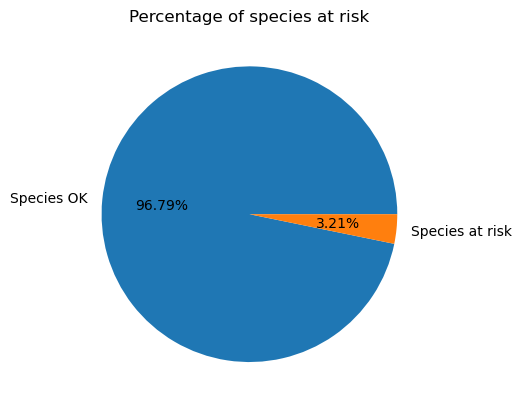

In [26]:
plt.pie(species["is_at_risk"].value_counts(), labels = ["Species OK", "Species at risk"] ,autopct = "%0.2f%%")
plt.title("Percentage of species at risk")
plt.show()

Fortunately the huge majority of species present in the parks are not at risk. Let's focus on the 3,26% at risk and determine what categories of specie are at risk

In [27]:
my_crosstab = pd.crosstab(species["category"], species["is_at_risk"])
my_crosstab["% Concerning"] = pd.crosstab(species["category"], species["is_at_risk"]).apply(lambda r: r[1]/r.sum(), axis=1).apply('{:.2f}%'.format)
my_crosstab

is_at_risk,no,yes,% Concerning
category,,,
Amphibian,72,7,0.09%
Bird,413,75,0.15%
Fish,115,10,0.08%
Mammal,146,30,0.17%
Nonvascular Plant,328,5,0.02%
Reptile,73,5,0.06%
Vascular Plant,4216,46,0.01%


Proportionnaly speaking, Bird and Mammal seem to be more likely to be at risk than other species. Is the differences observed statistically significant? 

In [28]:
from scipy.stats import chi2_contingency

chi2, pval, dof, expected = chi2_contingency([[413,75],[146,30]])
print(pval)

0.6875948096661336


By comparing the difference between bird and mammal we obtain : pval = 0.68 > 0.05. We do not reject the null hypothesis. That means there is no difference in term of likeliness to be a risk between these 2 species

In [29]:
chi2, pval, dof, expected = chi2_contingency([[413,75],[115,10]])
print(pval)

0.047482425302318096


By comparing the difference between bird and mammal we obtain : pval = 0.04 < 0.05. We reject the null hypothesis. That means there is a stastical difference in term of likeliness to be a risk between these 2 species. In that case, Birds are most likely to be at risk than fishes

As we can see, the vast majority of species that are at risk are at the step "Species of concern". Without historical information, We canno't assert any insight regarding the trend of the other categories. 

We can however have more information regarding the category of specie that are in each conservation status

conservation_status,Endangered,In Recovery,Species of Concern,Threatened,ok
category,,,,,
Amphibian,1,0,4,2,72
Bird,4,3,68,0,413
Fish,3,0,4,3,115
Mammal,6,0,22,2,146
Nonvascular Plant,0,0,5,0,328
Reptile,0,0,5,0,73
Vascular Plant,1,0,43,2,4216


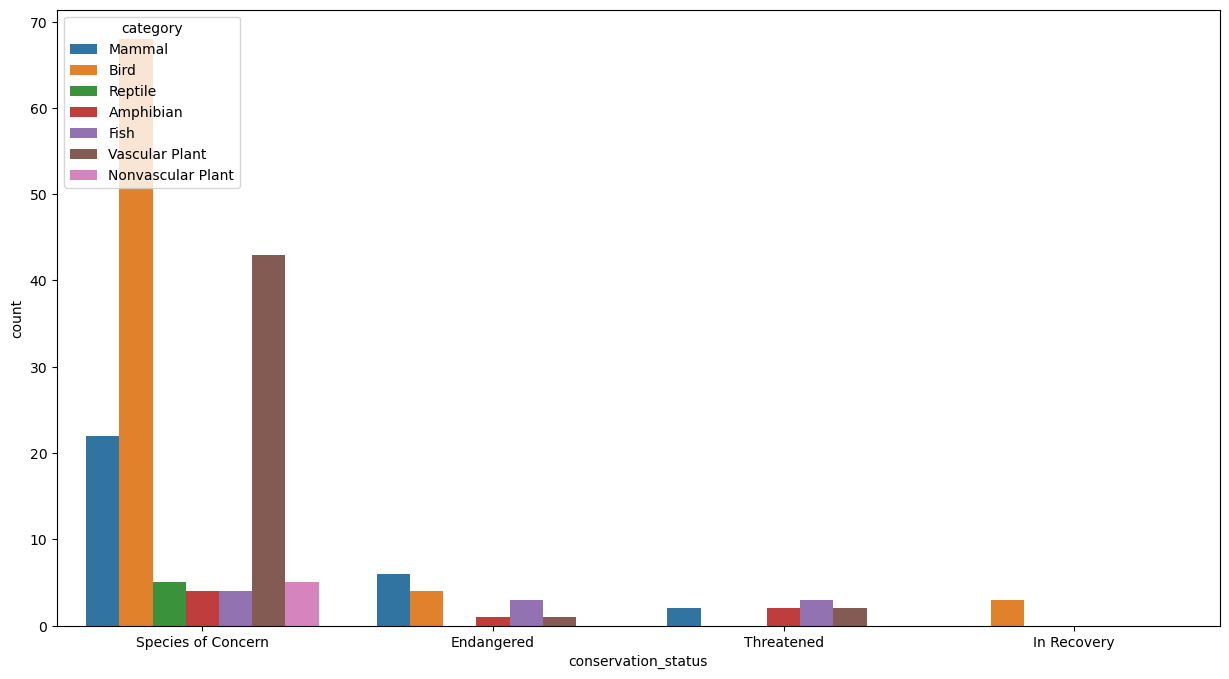

In [30]:
my_crosstab3 = pd.crosstab(species["category"], species["conservation_status"])
display(my_crosstab3)
plt.figure(figsize = (15,8))
sns.countplot(x = "conservation_status", hue = "category", data = species[species["is_at_risk"] == "yes"])
plt.show()

In [31]:
print("Statistical comparison")
print("\nBird vs Fish : Specie of Concern to Endangered")
chi2, pval, dof, expected = chi2_contingency([[68,4],[4,3]])
print("pval =",pval)
print("\nBird vs Mammal : Specie of Concern to Endangered")
chi2, pval, dof, expected = chi2_contingency([[68,4],[22,6]])
print("pval =",pval)

Statistical comparison

Bird vs Fish : Specie of Concern to Endangered
pval = 0.00882285438393537

Bird vs Mammal : Specie of Concern to Endangered
pval = 0.04502088100253867


Even thought Birds represent an important part of the species at risk, there are mostly considered as species of concerns. However for species like Mammals and Fishes, once they are at risk, they are more likely to be Endangered than bird.

Similar observations could be performed for the transition between species Endangered and Species Threatened

- Vascular Plant & Bird represent the majority of Specie of concern, but are far less present in the more severe status. if we look at proportion only, Species belonging to these 2 categories of species are less likely to have their conservation status worsening. Moreover, Bird seems to be the only categorie of specie that are In Recovery.
- Mammals, Amphibian & Fish are less numerous as Species of concern, however they are more likely to be Endangered and Threatened than the categoy above.
- Reptile and Nonvascular Plant do not have species Endangered nor Threatened

Below is a list of all the Endangered and Threatened species recorded in the dataframe

In [42]:
print("List of Endangered Species :")
display(species[species["conservation_status"] == "Endangered"][['scientific_name',"common_names"]])
print("\nList of Threatened Species :")
display(species[species["conservation_status"] == "Threatened"][['scientific_name',"common_names"]])

List of Endangered Species :


,scientific_name,common_names
8,Canis lupus,Wolf
9,Canis rufus,Wolf
34,Myotis grisescens,Myotis
39,Myotis sodalis,Myotis
72,Glaucomys sabrinus coloratus,Squirrel
173,Grus americana,Crane
276,Vermivora bachmanii,Warbler
343,Picoides borealis,Woodpecker
540,Etheostoma percnurum,Darter
570,Noturus baileyi,Madtom



List of Threatened Species :


,scientific_name,common_names
38,Myotis septentrionalis,Myotis
490,Erimonax monachus,Chub
571,Noturus flavipinnis,Madtom
704,Isotria medeoloides,Pogonia
2562,Spiraea virginiana,Spiraea
3032,Ursus arctos horribilis,Bear
4597,Anaxyrus canorus,Toad
4600,Rana draytonii,Frog
4612,Oncorhynchus clarkii henshawi,Trout


## Parks

We continue this analysis by examining the difference between parks

In [51]:
observations.groupby("park_name").scientific_name.count()

park_name
Bryce                    5823
Great Smoky Mountains    5818
Yellowstone              5819
Yosemite                 5821
Name: scientific_name, dtype: int64

Almost all the recorded species are present in all the parks

<AxesSubplot:xlabel='park_name', ylabel='observations'>

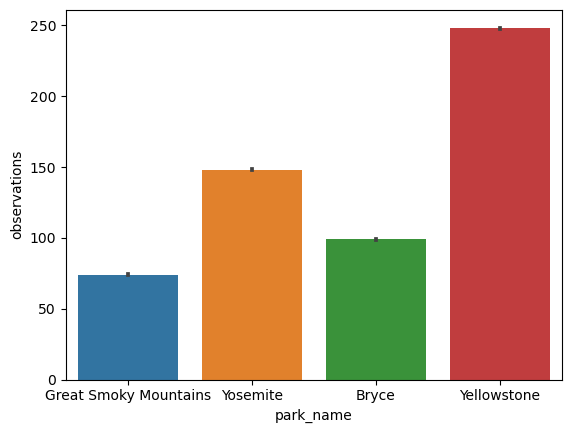

In [48]:
sns.barplot(x = "park_name", y ="observations", data = observations)

However the amount of average observation is quitte different between parks. This means that each park host a distinctive amount of specimen by specie 